In [2]:
import numpy as np 
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,random_split,Dataset
import torchvision.transforms as transforms
import torchvision.models as models
from d2l import torch as d2l
import matplotlib.pyplot as plt

In [3]:
# train = pd.read_csv('C:/Users/MJ/Desktop/FunctionApproximation/train.csv')
# test =pd.read_csv('C:/Users/MJ/Desktop/FunctionApproximation/test.csv')
# val_size = int(0.2 * len(train))
# train_size=len(train)-val_size
# train, valid = random_split(train,[train_size, val_size])

In [4]:
cuda = True if torch.cuda.is_available() else False

In [60]:
train=pd.read_csv("C:/Users/MJ/Desktop/FunctionApproximation/train.csv")
test=pd.read_csv("C:/Users/MJ/Desktop/FunctionApproximation/test.csv")
test_x=torch.tensor(test.drop(['id'],axis=1).values,dtype=torch.float32)

In [59]:
class FADataset(Dataset):
    def __init__(self, data):
        super().__init__()
        self.x=torch.tensor(data.drop(['id','y'],axis=1).values,dtype=torch.float32)
        self.y=torch.tensor(data['y'].values,dtype=torch.float32)
       
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        data=self.x[idx]
        target=self.y[idx]
        return data,target,idx

    # def update_loss_value(self, idx):
    #     self.flag[idx] = True
        

In [95]:
batch_size=80
dataset=FADataset(train)
trainset, validset = random_split(dataset, [0.9, 0.1])
train_dl= DataLoader(trainset, shuffle=True, batch_size=batch_size)
valid_dl= DataLoader(validset, shuffle=True, batch_size=batch_size)
test_dl=DataLoader(test_x,shuffle=False, batch_size=batch_size)

In [96]:
class MLP(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2,num_hidden3, output_dim):
        super().__init__()
        self.model=nn.Sequential(nn.Linear(input_dim,num_hidden1),
                                 nn.ReLU(True),
                                 nn.Linear(num_hidden1,num_hidden2),
                                 nn.ReLU(True),
                                 nn.Linear(num_hidden2,num_hidden3),
                                 nn.ReLU(True),
                                 nn.Linear(num_hidden3,output_dim)
                                )
    def forward(self, x):
        return self.model(x)


In [97]:
model=[]
optimizer=[]

for i in range(3):
    model.append(MLP(input_dim=2, num_hidden1=80,num_hidden2=64,num_hidden3=80, output_dim=1))
    optimizer.append(torch.optim.Adam(model[i].parameters(), lr=0.0001))
criterion = nn.MSELoss()


In [98]:
num_epochs = 20
losses=[]
size = len(train_dl)

for epoch in range(num_epochs):
    for batch,(data, target,idx) in enumerate(train_dl):
        for i in range(3):
            model[i].train()
            outputs = model[i](data)
            loss = criterion(outputs, target)
            optimizer[i].zero_grad()
            loss.backward()
            optimizer[i].step()
            if batch % 80 == 0: #每通過batch個數量的資料就輸出一次損失的值
                print(f"loss: {loss.item():>7f} ")
                losses.append(loss.item())

c:\Users\MJ\anaconda3\envs\MJ\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([80])) that is different to the input size (torch.Size([80, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


loss: 1.269960 
loss: 1.461578 
loss: 1.424307 
loss: 0.574789 
loss: 0.673505 
loss: 0.528802 
loss: 0.506577 
loss: 0.586171 
loss: 0.417844 
loss: 0.151131 
loss: 0.176663 
loss: 0.156599 
loss: 0.140954 
loss: 0.167019 
loss: 0.144040 
loss: 0.133306 
loss: 0.134750 
loss: 0.133660 
loss: 0.153314 
loss: 0.154227 
loss: 0.152734 
loss: 0.134100 
loss: 0.133599 
loss: 0.132975 
loss: 0.154533 
loss: 0.153245 
loss: 0.153573 
loss: 0.168619 
loss: 0.167277 
loss: 0.167720 
loss: 0.135137 
loss: 0.133340 
loss: 0.134015 
loss: 0.166891 
loss: 0.166000 
loss: 0.165847 
loss: 0.163164 
loss: 0.162618 
loss: 0.161828 
loss: 0.144605 
loss: 0.144051 
loss: 0.143970 
loss: 0.119228 
loss: 0.118496 
loss: 0.118261 
loss: 0.162449 
loss: 0.162650 
loss: 0.161279 
loss: 0.136645 
loss: 0.136264 
loss: 0.135922 
loss: 0.160245 
loss: 0.160276 
loss: 0.160016 
loss: 0.128729 
loss: 0.129142 
loss: 0.128435 
loss: 0.134447 
loss: 0.134765 
loss: 0.134273 
loss: 0.158605 
loss: 0.159086 
loss: 0.

In [99]:
model[0].eval()
for batch,(data, target,idx) in enumerate(valid_dl):
    outputs = (model[0](data)+model[1](data)+model[2](data))/3
    loss = criterion(outputs.reshape(-1), target.reshape(-1))
    print(f"loss: {loss.item():>7f} ")

loss: 0.138868 
loss: 0.139117 
loss: 0.148924 
loss: 0.149745 
loss: 0.126600 
loss: 0.125751 
loss: 0.137826 
loss: 0.147200 
loss: 0.144587 
loss: 0.150597 


In [100]:
for i in range(3):
    model[i].eval()
    for batch,(data, target,idx) in enumerate(valid_dl):
        outputs = model[i](data)
        loss = criterion(outputs.reshape(-1), target.reshape(-1))
    print(f"loss: {loss.item():>7f} ")

loss: 0.152027 
loss: 0.136518 
loss: 0.134721 


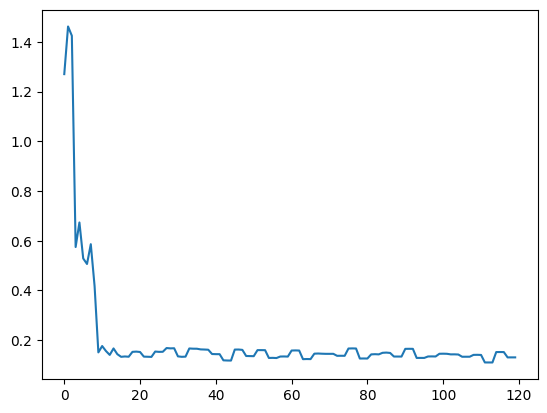

In [101]:
plt.plot(losses)

In [93]:
model[0].eval()
output=[]
for data in test_dl:
    out = model[0](data)


In [102]:
model[0].eval()
output=[]
for i in range(len(test_x)):
    output.append((model[0](test_x[i])).item())

In [104]:
min(output)

1.0273019075393677

In [105]:
train_y.min()

0.0262

In [56]:
sample_submission=pd.read_csv("C:/Users/MJ/Desktop/FunctionApproximation/sample_submission.csv")
sample_submission['y']=output
sample_submission.to_csv("C:/Users/MJ/Desktop/sample_submission.csv",index=False)